In [2]:
from mlwpy import *
%matplotlib inline

iris = datasets.load_iris()

In [3]:
(iris_train, iris_test, 
 iris_train_tgt, iris_test_tgt) = skms.train_test_split(iris.data, iris.target,
                                                        test_size=.25)

# remove units ' (cm)' from names
iris.feature_names = [fn[:-5] for fn in iris.feature_names]

# dataframe for convenience
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

In [4]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


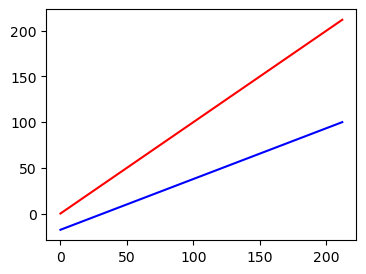

In [6]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
f_temps = np.linspace(0, 212, 100)
c_temps = (5/9) * (f_temps - 32)

plt.plot(f_temps, f_temps, 'r', # F -> F
         f_temps, c_temps, 'b'); # F -> C

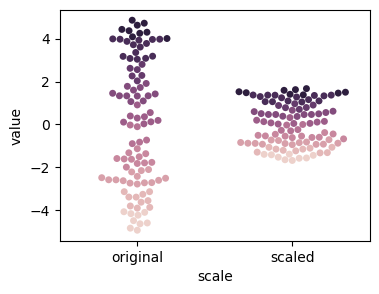

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4,3))
original = np.random.uniform(-5, 5, 100)
scaled = skpre.StandardScaler().fit_transform(original.reshape(-1,1))[:,0]
bins = np.floor(original).astype(np.uint8) + 5

df = pd.DataFrame({'original': original,
                   'scaled': scaled,
                   'hue': bins})

df = pd.melt(df, id_vars='hue', var_name='scale')

sns.swarmplot(x='scale', y='value', hue='hue', data=df).legend_.remove()

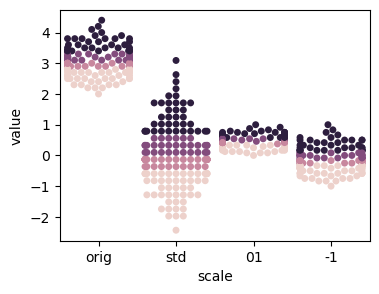

In [12]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

bins = pd.cut(iris_df['sepal width'],
             np.percentile(iris_df['sepal width'],
                          [25, 50, 75, 100])).cat.codes

df = pd.DataFrame({'orig':iris_df['sepal width'],
                  'hue':bins})

scalers = [('std', skpre.StandardScaler()),
          ('01', skpre.MinMaxScaler()),
          ('-1', skpre.MinMaxScaler((-1,1)))]

for name, scaler in scalers:
    df[name] = scaler.fit_transform(df[['orig']]).reshape(-1)
    
df = pd.melt(df, id_vars='hue', var_name='scale')
sns.swarmplot(x='scale', y='value', hue='hue', data=df).legend_.remove()

In [17]:
# discretization

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

display(iris_df.iloc[[0,50,100]])

,sepal length,sepal width,petal length,petal width,species
0,5.1000,3.5000,1.4000,0.2000,setosa
50,7.0000,3.2000,4.7000,1.4000,versicolor
100,6.3000,3.3000,6.0000,2.5000,virginica


In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

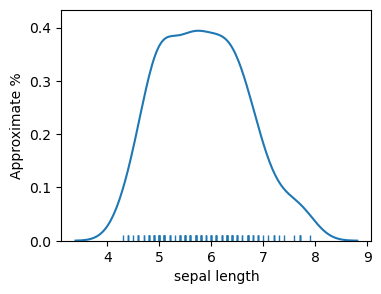

In [18]:
plt.subplots(1,1,figsize=(4,3))
ax = sns.distplot(iris_df['sepal length'], hist=False, rug=True)
ax.set_ylabel("Approximate %");

In [77]:
column = iris_df[['sepal length']] #keep 2Dness bc sk complains
col_mean = column.mean().values


both = column.copy()
both['> Mean'] = np.where(column > column.mean(), True, False)


print('Column Mean', col_mean)
display(both.iloc[[0,50,100]])

Column Mean [5.8433]


,sepal length,> Mean
0,5.1000,False
50,7.0000,True
100,6.3000,True


In [66]:
col_mean

array([5.8433])

In [67]:
iris_df[['sepal length']]

,sepal length
0,5.1000
1,4.9000
2,4.7000
3,4.6000
4,5.0000
...,...
145,6.7000
146,6.3000
147,6.5000
148,6.2000


In [72]:
column.values.shape

(150, 1)

In [71]:
(column.values.reshape(1,-1)).shape

(1, 150)

In [73]:
col_mean.shape

(1,)

In [75]:
col_mean.reshape(-1,1).shape

(1, 1)

In [60]:
new_iris_df = pd.DataFrame(iris_df, columns=['petal length', 'petal width', 'species'])


new_iris_df.columns = pd.MultiIndex([['input ftrs', 'target ftr'],
                                    new_iris_df.columns],
                                   [[1, 0, 0], [0, 1, 2]])

new_iris_df.sort_index(axis='columns', inplace=True)
display(new_iris_df.iloc[[0,50,100]])

input ftrs                       target ftr
             petal width     species         petal length
0                 0.2000      setosa               1.4000
50                1.4000  versicolor               4.7000
100               2.5000   virginica               6.0000

In [63]:
print("Numerical categories:",
     iris.target[[0,50,100]], sep='\n')

# produces sparse representation
sparse = skpre.OneHotEncoder().fit_transform(iris.target.reshape(-1,1))

print("One-hot coding:",
     sparse[[0,50,100]].todense(), sep="\n")

Numerical categories:
[0 1 2]
One-hot coding:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [78]:
encoded = pd.get_dummies(iris_df, prefix="is")
encoded.iloc[[0,50,100]]

,sepal length,sepal width,petal length,petal width,is_setosa,is_versicolor,is_virginica
0,5.1000,3.5000,1.4000,0.2000,1,0,0
50,7.0000,3.2000,4.7000,1.4000,0,1,0
100,6.3000,3.3000,6.0000,2.5000,0,0,1


In [79]:
encoded_species = pd.get_dummies(iris.target)
encoded_df = pd.merge(iris_df, encoded_species,
                     right_index=True, left_index=True)

encoded_df.iloc[[0,50,100]]

,sepal length,sepal width,petal length,petal width,species,0,1,2
0,5.1000,3.5000,1.4000,0.2000,setosa,1,0,0
50,7.0000,3.2000,4.7000,1.4000,versicolor,0,1,0
100,6.3000,3.3000,6.0000,2.5000,virginica,0,0,1


In [80]:
import patsy.contrasts as pc

levels = iris.target_names
coding = (pc.Treatment(reference=0).code_with_intercept(list(levels)))

print(coding)

ContrastMatrix(array([[1., 0., 0.],
                      [0., 1., 0.],
                      [0., 0., 1.]]),
               ['[setosa]', '[versicolor]', '[virginica]'])


In [81]:
encoded = patsy.dmatrix('species-1',
                       iris_df,
                       return_type='dataframe')

display(encoded.iloc[[0,50,100]])

,species[setosa],species[versicolor],species[virginica]
0,1.0000,0.0000,0.0000
50,0.0000,1.0000,0.0000
100,0.0000,0.0000,1.0000


In [82]:
encoded = patsy.dmatrix('species',
                       iris_df,
                       return_type='dataframe')

display(encoded.iloc[[0,50,100]])

,Intercept,species[T.versicolor],species[T.virginica]
0,1.0000,0.0000,0.0000
50,1.0000,1.0000,0.0000
100,1.0000,0.0000,1.0000


In [83]:
pet_data = pd.DataFrame({'pet' :['cat', 'cat', 'dog'],
                        'cost' :[20.0, 25.0, 40.0]})

pet_df = pd.get_dummies(pet_data)
display(pet_df)

,cost,pet_cat,pet_dog
0,20.0000,1,0
1,25.0000,1,0
2,40.0000,0,1


In [86]:
def pretty_coeffs(sk_lr_model, ftr_names):
    ' helper to display sklearn results in a nice dataframe '
    lr_coeffs = pd.DataFrame(sk_lr_model.coef_,
                            columns=ftr_names,
                            index=["Coeff"])
    
    lr_coeffs['intercept'] = sk_lr_model.intercept_
    return lr_coeffs

In [87]:
sk_tgt = pet_df['cost'].values.reshape(-1,1)
sk_ftrs = pet_df.drop('cost', axis='columns')

sk_model = (linear_model.LinearRegression(fit_intercept=False)
                        .fit(sk_ftrs, sk_tgt))

display(pretty_coeffs(sk_model, sk_ftrs.columns))

,pet_cat,pet_dog,intercept
Coeff,22.5000,40.0000,0.0000


In [89]:
import statsmodels as sm
import statsmodels.formula.api as smf

In [91]:
formula = 'cost ~ pet - 1'

sm_model = smf.ols(formula, data=pet_data).fit()
display(pd.DataFrame(sm_model.params).T)

,pet[cat],pet[dog]
0,22.5000,40.0000


In [92]:
sk_tgt = pet_df['cost'].values.reshape(-1,1)
sk_ftrs = pet_df.drop('cost', axis='columns')
sk_model = (linear_model.LinearRegression()
                        .fit(sk_ftrs, sk_tgt))

display(pretty_coeffs(sk_model, sk_ftrs.columns))

,pet_cat,pet_dog,intercept
Coeff,-8.7500,8.7500,31.2500


In [94]:
pet_data_p1 = pet_data.copy()
pet_data_p1['ones'] = 1.0

formula = 'cost ~ (pet -1) + ones'
sm_model = smf.ols(formula, data=pet_data_p1).fit()

display(pd.DataFrame(sm_model.params).T)

,pet[cat],pet[dog],ones
0,1.6667,19.1667,20.8333
